# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [168]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Library Numpy
import numpy as np

In [169]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, how = "left", on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [170]:
mouse_data_complete.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [171]:
# Checking the number of mice.
number_mice = len(mouse_data_complete["Mouse ID"].unique()) 
number_mice

249

In [172]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_id = mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"])
duplicated_id.value_counts()

False    1888
True        5
dtype: int64

In [173]:
mouse_data_complete.loc[duplicated_id,:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [174]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_complete[mouse_data_complete["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [175]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data_complete
print(clean_df.shape)

clean_df = clean_df.drop(clean_df[clean_df["Mouse ID"] == "g989"].index, axis=0)
print(clean_df.shape)

clean_df

(1893, 8)
(1880, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [176]:
# Checking the number of mice in the clean DataFrame.
clean_df[clean_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [177]:
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [178]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

average_tumor_vol = mouse_data_complete.groupby("Drug Regimen").mean(numeric_only=True)["Tumor Volume (mm3)"]
median_tumor_vol = mouse_data_complete.groupby("Drug Regimen").median(numeric_only=True)["Tumor Volume (mm3)"]
var_tumor_vol = mouse_data_complete.groupby("Drug Regimen").var(numeric_only=True)["Tumor Volume (mm3)"]
stddev_tumor_vol = mouse_data_complete.groupby("Drug Regimen").std(numeric_only=True)["Tumor Volume (mm3)"]
sem_tumor_vol = mouse_data_complete.groupby("Drug Regimen").sem(numeric_only=True)["Tumor Volume (mm3)"]

d = {"Mean Tumor Volume" : average_tumor_vol.map("{:,.2f}".format),
        "Median Tumor Volume" : median_tumor_vol.map("{:,.2f}".format),
        "Tumor Volume Variance" : var_tumor_vol.map("{:,.2f}".format),
        "Tumor Volume Std. Dev." : stddev_tumor_vol.map("{:,.2f}".format),
        "Tumor Volume Std. Err." : sem_tumor_vol.map("{:,.2f}".format)}

statistics_summary = pd.DataFrame(data=d)

statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [179]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

mouse_data_complete.groupby("Drug Regimen").agg("mean")

/var/folders/hj/mnl5qf615nbg_vjc6gbrgclc0000gn/T/ipykernel_65638/1047026528.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mouse_data_complete.groupby("Drug Regimen").agg("mean")


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.894410,27.043478,16.863354,52.322552,0.975155
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [180]:
# Using the aggregation method, produce the same summary statistics in a single line

summary_describe = mouse_data_complete.groupby("Drug Regimen").describe()["Tumor Volume (mm3)"]
summary_describe

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [181]:
graphic_mouse = mouse_data_complete.groupby("Drug Regimen").count()["Timepoint"]
graphic_mouse

#print(len("Drug Regimen"))

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [182]:
x_axis = np.arange(len("Drug Regimen")-1)
print(x_axis)

tick_locations = [value for value in x_axis]
print(tick_locations)

graphic_mouse[0:10].max()
print(graphic_mouse[0:10])

[ 0  1  2  3  4  5  6  7  8  9 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64


In [183]:
drugs = graphic_mouse.index
drugs

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

In [184]:
list_mouse = list(graphic_mouse)
list_mouse

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

## Bar and Pie Charts

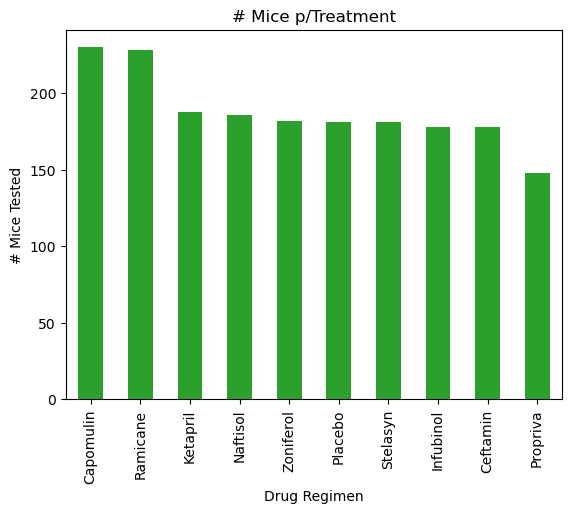

<Figure size 640x480 with 0 Axes>

In [185]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_tested_drugs = clean_df["Drug Regimen"].value_counts()

plot_pandas = mice_count.plot.bar(color="tab:green")

plt.xlabel("Drug Regimen")
plt.ylabel("# Mice Tested")
plt.title("# Mice p/Treatment")

plt.show()
plt.tight_layout()

In [186]:
mice_tested_drugs

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

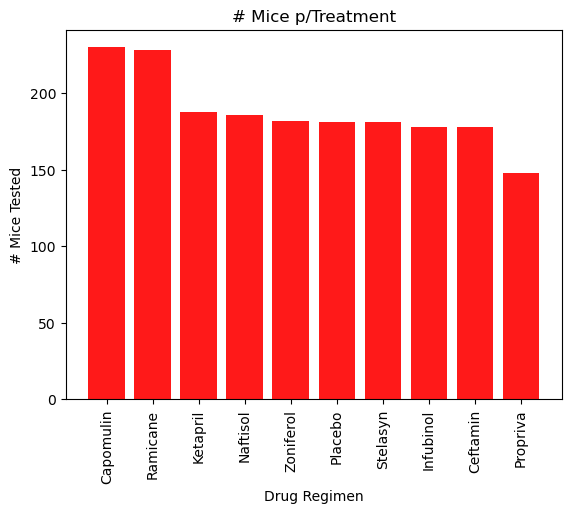

<Figure size 640x480 with 0 Axes>

In [187]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_tested_drugs.index.values
y_axis = mice_tested_drugs.values

plt.bar(x_axis, y_axis, color='r', alpha=0.9, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("# Mice Tested")
plt.xticks(rotation="vertical")
plt.title("# Mice p/Treatment")

plt.show()
plt.tight_layout()


In [188]:
gender_data = clean_df["Sex"].value_counts()
gender_data

Male      958
Female    922
Name: Sex, dtype: int64

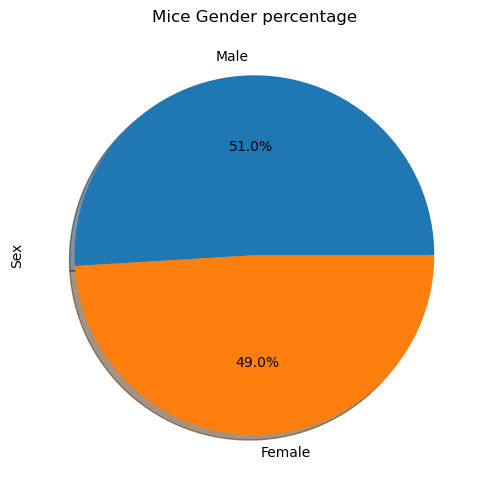

In [189]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data.plot.pie(y = "Sex", figsize=(5, 5), shadow=True, autopct="%1.1f%%")

plt.title("Mice Gender percentage")
plt.tight_layout()
plt.show()
  

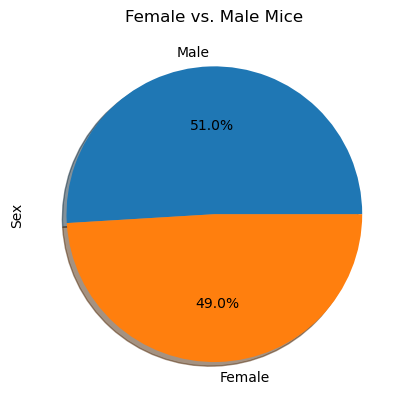

In [190]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = clean_df["Sex"].unique()

plt.pie(gender_data, labels=labels, shadow=True, autopct="%1.1f%%")

plt.ylabel("Sex")
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [201]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.   
    # Locate the rows which contain mice on each drug and get the tumor volumes   
    # add subset 
    # Determine outliers using upper and lower bounds

by_mouse = mouse_data_complete.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

merged_df = by_mouse_reset[['Mouse ID','Timepoint']].\
                            merge(mouse_data_complete , on=['Mouse ID','Timepoint'], how="left")

def get_outliers(regimen):
    regimen_data = merged_df.loc[merged_df["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data

cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [202]:
by_mouse = mouse_data_complete.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()
by_mouse_reset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,45.000000,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [203]:
merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
                            merge(mouse_data_complete , on=['Mouse ID','Timepoint'], how="left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [204]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs_list = {"Capomulin", "Ramicane", "Infubinol", "Ceftamin"}
drugs_df = clean_df[clean_df["Drug Regimen"].isin(drugs_list)]
#drugs_df = merged_data[merged_data["Drug Regimen"].isin(drugs_list)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs_df.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint

tumor_size
Drug Regimen Mouse ID            
Capomulin    b128       38.982878
             b742       38.939633
             f966       30.485985
             g288       37.074024
             g316       40.159220
...                           ...
Ramicane     s508       30.276232
             u196       40.667713
             w678       43.166373
             y449       44.183451
             z578       30.638696

[100 rows x 1 columns]

In [205]:
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
last_timepoint.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,tumor_size,NaN,NaN,67.973419,NaN
a251,tumor_size,NaN,NaN,65.525743,NaN
a275,tumor_size,NaN,62.999356,NaN,NaN
a411,tumor_size,NaN,NaN,NaN,38.407618
a444,tumor_size,NaN,NaN,NaN,43.047543


In [206]:
drugs_list

{'Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'}

In [207]:
drugs_df.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3


In [208]:
clean_df["Drug Regimen"].isin(drugs_list)

0        True
1        True
2        True
3        True
4        True
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Drug Regimen, Length: 1880, dtype: bool

In [209]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = 0
for drug in drugs_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ceftamin treatments is: 48.72
The upper quartile of Ceftamin treatments is: 64.3
The interquartile range of Ceftamin treatments is: 15.58
Values below 25.35 could be Ceftamin outliers.
Values above 87.67 could be Ceftamin outliers.
--------------------------------------------

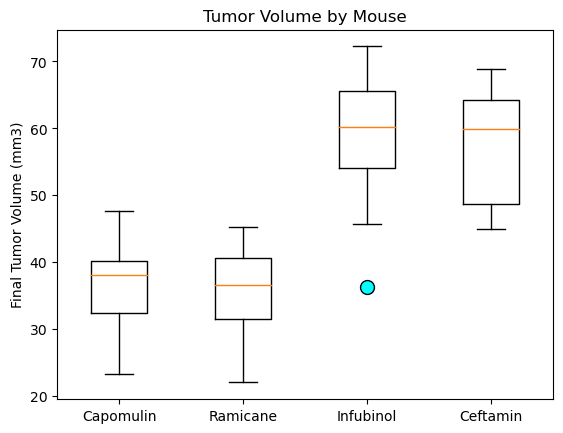

In [213]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# The red_dot indicates the outliers founded before

red_dot = dict(markerfacecolor = "cyan", markersize=10)

plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume by Mouse')

plt.show()

## Line and Scatter Plots

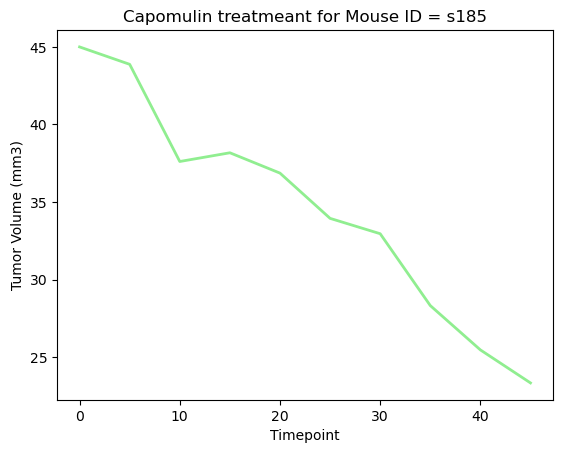

In [221]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin. 

capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

# In this case I choose Mouse ID = "s185"
MOUSEID = "s185"

mouse_selected_df = capomulin_df.loc[capomulin_df["Mouse ID"] == MOUSEID,:]
x_axis = mouse_selected_df["Timepoint"]
tumor_size = mouse_selected_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title(f"Capomulin treatmeant for Mouse ID = {MOUSEID}")
plt.plot(x_axis, tumor_size, linewidth=2, color="lightgreen")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [214]:
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [222]:
mouse_s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185",:]
mouse_s185_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


/var/folders/hj/mnl5qf615nbg_vjc6gbrgclc0000gn/T/ipykernel_65638/2417982557.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capomulin_vol = capomulin_df.groupby(['Mouse ID']).mean()


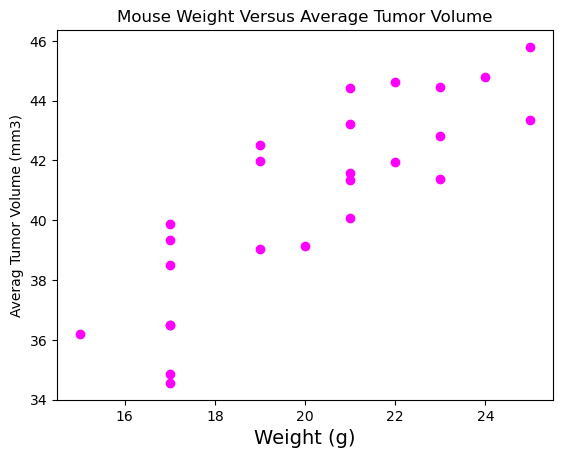

In [226]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_capomulin_vol = capomulin_df.groupby(['Mouse ID']).mean()

fig2, ax1 = plt.subplots()
marker_size=10
plt.scatter(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol["Tumor Volume (mm3)"], color="magenta")
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Averag Tumor Volume (mm3)")
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.show()

## Correlation and Regression

The correlation between Weight and the Average Tumor Volume is 0.84


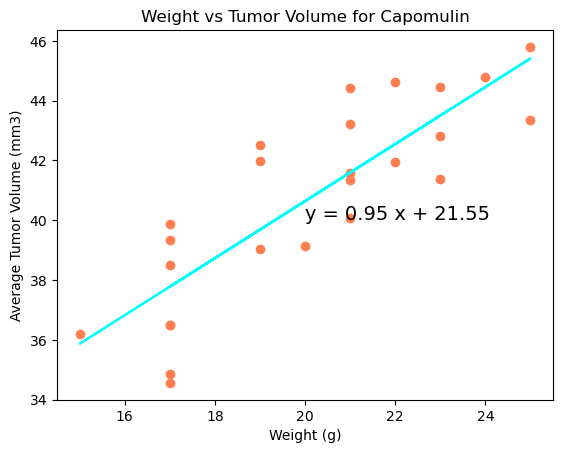

In [237]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(avg_capomulin_vol["Weight (g)"], avg_capomulin_vol["Tumor Volume (mm3)"])
print(f"The correlation between Weight and the Average Tumor Volume is {round(correlation[0],2)}")

# Add the linear regression equation and line to plot
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress (avg_capomulin_vol["Weight (g)"] , avg_capomulin_vol["Tumor Volume (mm3)"])
regression_model = avg_capomulin_vol ["Weight (g)"] * slope + intercept
linear_equation= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol["Tumor Volume (mm3)"],color='coral')
plt.plot(avg_capomulin_vol["Weight (g)"], regression_model, color='cyan')
plt.annotate(linear_equation,(20,40), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()
